In [486]:
#IMPORTING NEEDED LIBRARIES AND FUNCTIONS 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

#pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns', None)

pd.set_option('display.max_columns', None)  
# pd.set_option("display.max_colwidth", -1)

In [487]:
#FILE READING 

df = pd.read_csv(r"C:\Users\Dhanashree\Desktop\Upgrad learning data\Linear Regression\day.csv")

In [488]:
# READING THE DATA 

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [489]:
#READING THE DATA

df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [490]:
nu_of_records=df.shape
print('There are Total',nu_of_records[0],'number of records and', nu_of_records[1] ,'attributes in the dataset')
print('-'*80)
dimension = df.ndim
print('The dimension of the dataset is   :', dimension)
print('-'*80)
index= df.index
print('Index of the dataset is           :', index)
print('-'*80)
size = df.size
print('The size of the dataset is        :' , size)

There are Total 730 number of records and 16 attributes in the dataset
--------------------------------------------------------------------------------
The dimension of the dataset is   : 2
--------------------------------------------------------------------------------
Index of the dataset is           : RangeIndex(start=0, stop=730, step=1)
--------------------------------------------------------------------------------
The size of the dataset is        : 11680


In [491]:
#DESCRIPTIVE STATISTICS OF DATA
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [492]:
#VALUE COUNTS OF TARGET VARIABLE
df.cnt.value_counts()

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5345    1
5046    1
4713    1
4763    1
2729    1
Name: cnt, Length: 695, dtype: int64

### Unique Values in  all the Columns of the Data

In [493]:
#CHECKING FOR UNIQUE VALUES IN ALL THE COLUMNS OF THE DATASET
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [494]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Renaming the Columns to their  appropriate Name

* yr - year
* mnth - month
* hum - humidity
* temp - temprature
* cnt - count

In [495]:
# Renaming the Columns

df.rename(columns={'yr':'year','mnth':'month','temp':'temperature','hum':'humidity','cnt':'count'}, inplace=True)

#### Removing Unnecessary Columns from the Dataset 

* We are dorpping the following columns
    * instant - this columns contains all the unique values in it as index for the row
    * dteday - this columns contain the date which can be accessed using two other columns as month and year column
    * casual - this column contains the value as casual users which does not add any as such meaning to the model 
    * registered - this column contains the value as registered users which does not add any meaning to the data for prediction
  

In [496]:
#REMOVING UNECESSARY COLUMNS FROM THE DATASET 

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

#### Mapping the Non-Binary Categorical Columns to their Original Values

* seaon
* month
* weekday
* weathersit

In [497]:
#MAPPING THE NON-BINARY CATEGORICAL COLUMNS TO THEIR ORIGINAL VALUES

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.month = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [498]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [499]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Histogram of the 'count' variable
# plt.figure(figsize=(8, 6))
# sns.histplot(df['count'], kde=True)
# plt.xlabel('Count')
# plt.ylabel('Frequency')
# plt.title('Distribution of Count')
# plt.show()

# # Scatter plot of 'temperature' vs. 'count'
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='temperature', y='count', data=df)
# plt.xlabel('Temperature')
# plt.ylabel('Count')
# plt.title('Temperature vs. Count')
# plt.show()

In [500]:
# # Calculate the correlation matrix
# correlation_matrix = df.corr()

# # Plot the correlation heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()


### Univariate Analysis using Exploratory Data Analysis 

In [501]:
# list of Categorical columns------
Categorcal_col =[]
Cat_col = df.select_dtypes(exclude =[np.number])

for i in Cat_col:
    Categorcal_col.append(i)
print('Categorical Columns:',Categorcal_col)

Categorical Columns: ['season', 'month', 'weekday', 'weathersit']


In [502]:
f=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',  'Race', 'Diabetic',
   'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

list(enumerate(f))

[(0, 'HeartDisease'),
 (1, 'Smoking'),
 (2, 'AlcoholDrinking'),
 (3, 'Stroke'),
 (4, 'DiffWalking'),
 (5, 'Sex'),
 (6, 'Race'),
 (7, 'Diabetic'),
 (8, 'PhysicalActivity'),
 (9, 'GenHealth'),
 (10, 'Asthma'),
 (11, 'KidneyDisease'),
 (12, 'SkinCancer')]

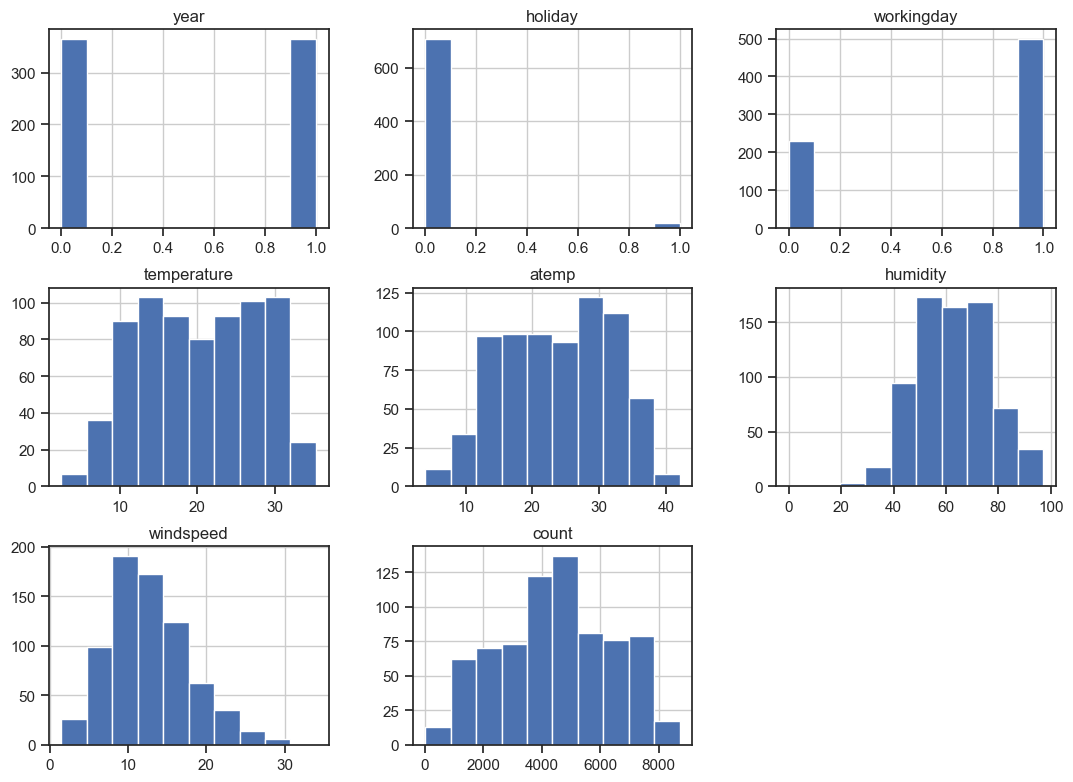

In [49]:
df.hist(figsize =(13,16),layout=(5,3),sharex = False);

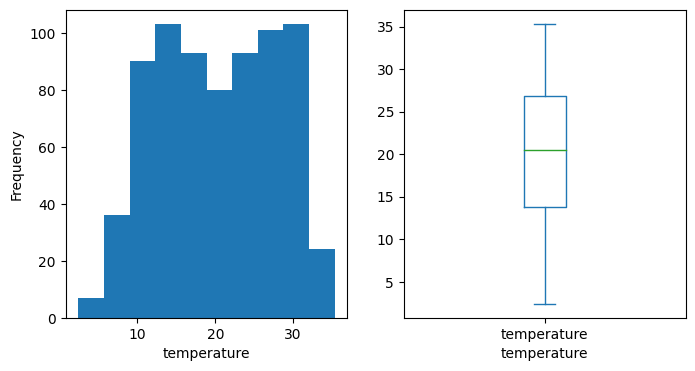

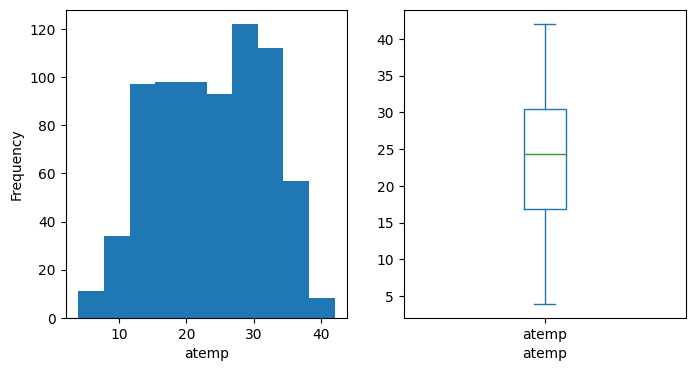

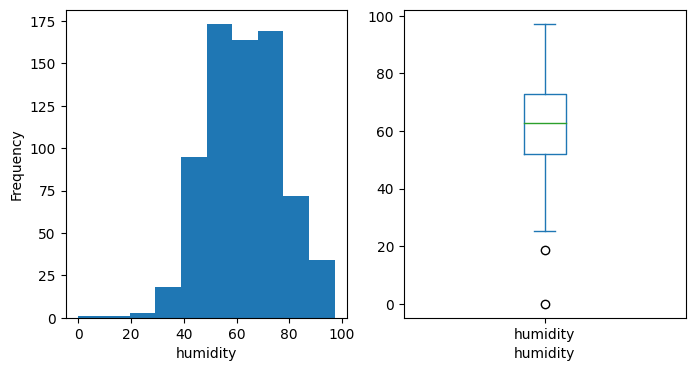

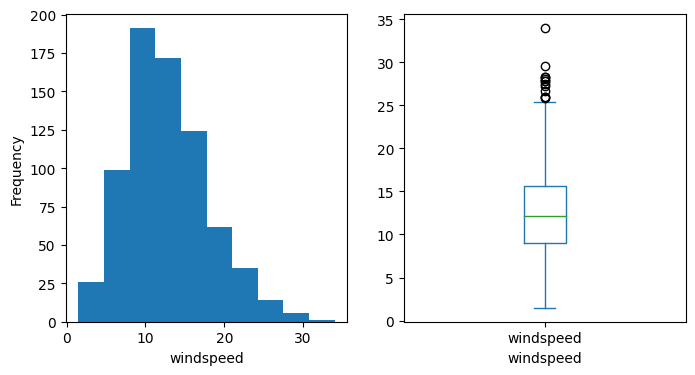

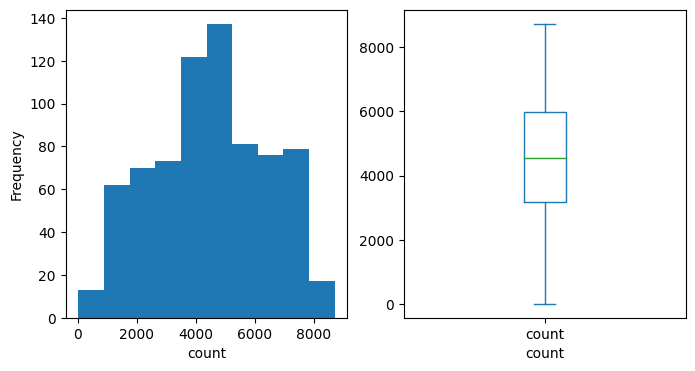

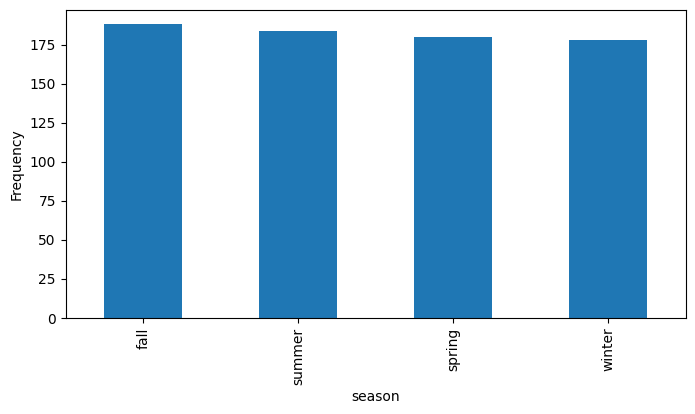

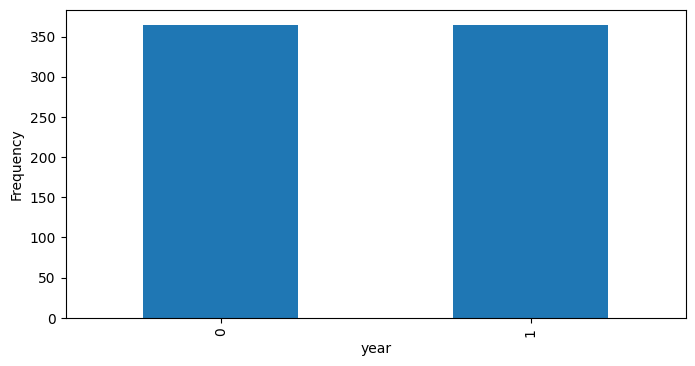

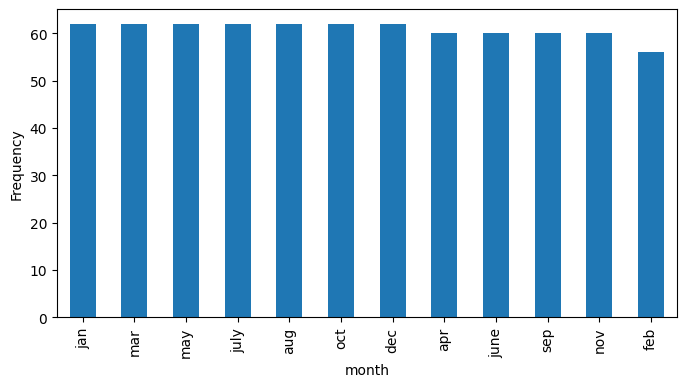

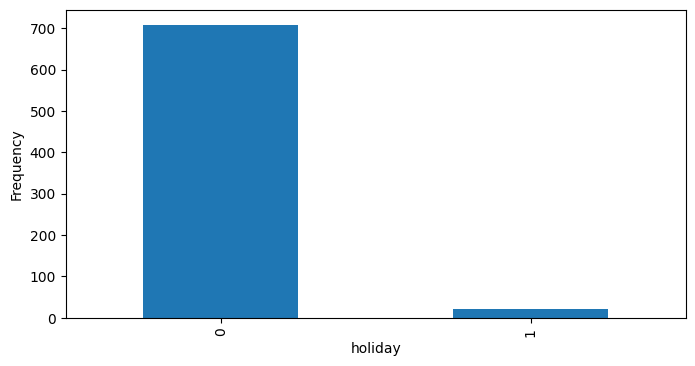

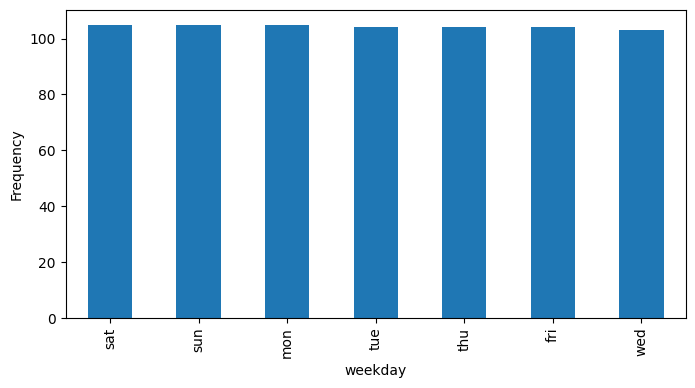

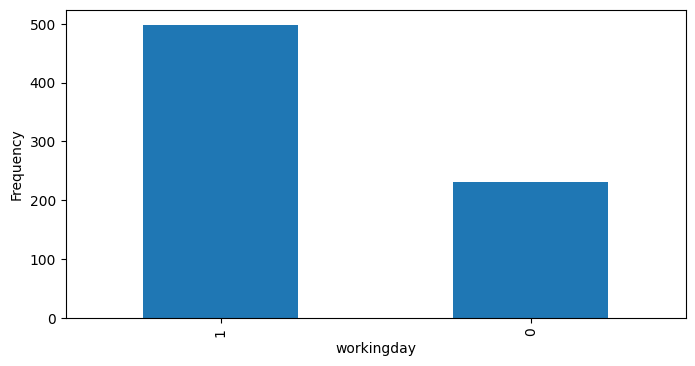

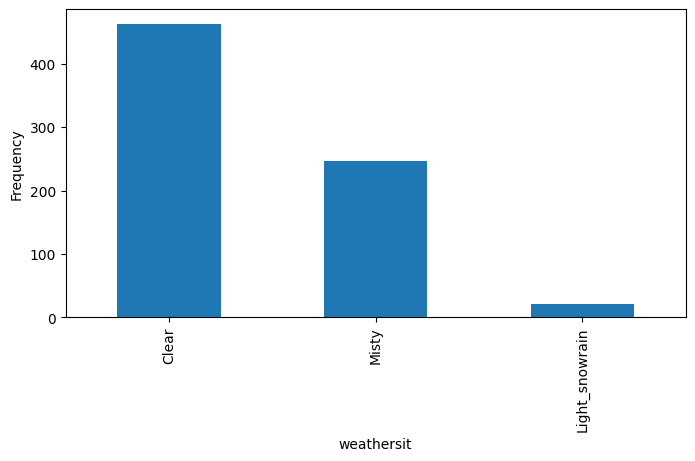

In [38]:
import matplotlib.pyplot as plt

# Univariate analysis - Continuous variables
continuous_vars = ['temperature', 'atemp', 'humidity', 'windspeed', 'count']
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    df[var].plot.hist(bins=10)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.subplot(1, 2, 2)
    df[var].plot.box()
    plt.xlabel(var)
    plt.show()

# Univariate analysis - Categorical variables
categorical_vars = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    df[var].value_counts().plot.bar()
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


### Bivariate Analysis

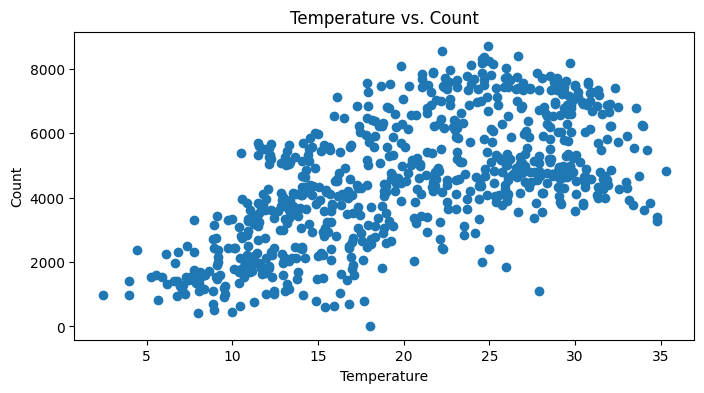

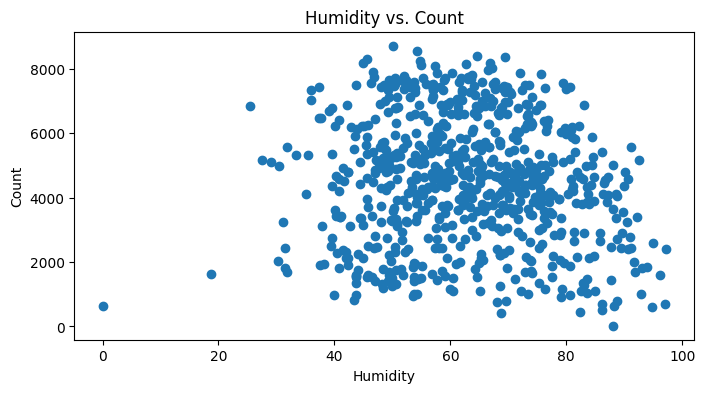

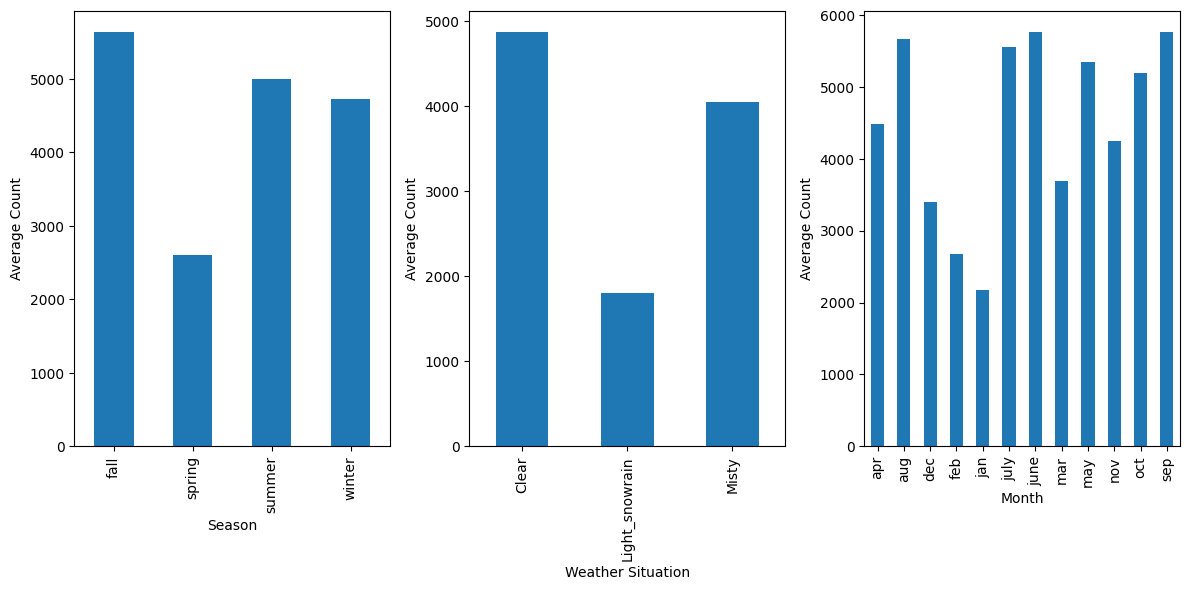

In [39]:
# Bivariate analysis - Continuous vs. Continuous
plt.figure(figsize=(8, 4))
plt.scatter(df['temperature'], df['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs. Count')
plt.show()

plt.figure(figsize=(8, 4))
plt.scatter(df['humidity'], df['count'])
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs. Count')
plt.show()

# Bivariate analysis - Categorical vs. Continuous
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
df.groupby('season')['count'].mean().plot.bar()
plt.xlabel('Season')
plt.ylabel('Average Count')
plt.subplot(1, 3, 2)
df.groupby('weathersit')['count'].mean().plot.bar()
plt.xlabel('Weather Situation')
plt.ylabel('Average Count')
plt.subplot(1, 3, 3)
df.groupby('month')['count'].mean().plot.bar()
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.tight_layout()
plt.show()


### Multivariate Analysis

In [ ]:
correlation = df.corr()
correlation 

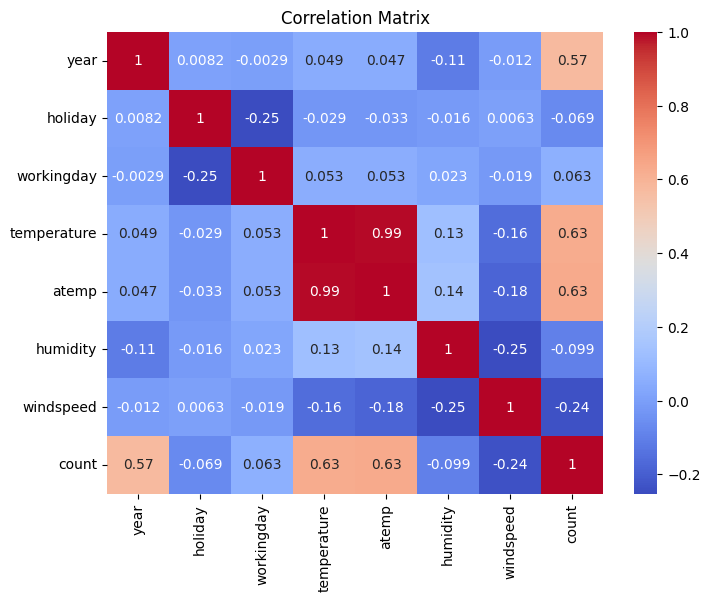

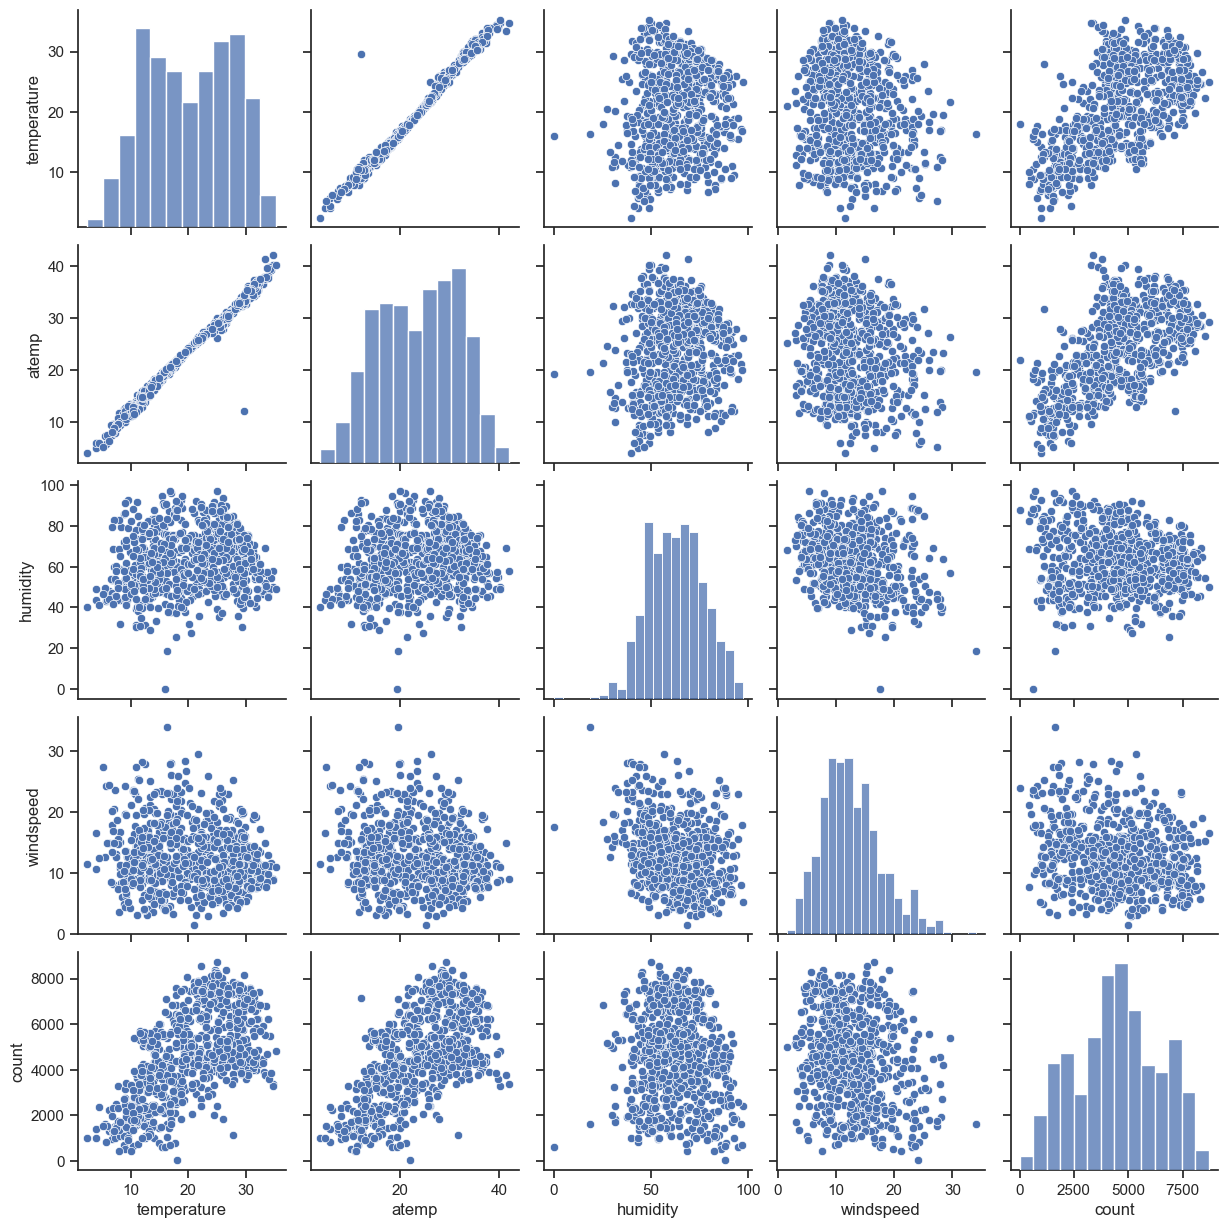

In [40]:
import seaborn as sns

# Multivariate analysis - Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Multivariate analysis - Scatter matrix
sns.set(style='ticks')
sns.pairplot(df[continuous_vars])
plt.show()


In [58]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temperature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

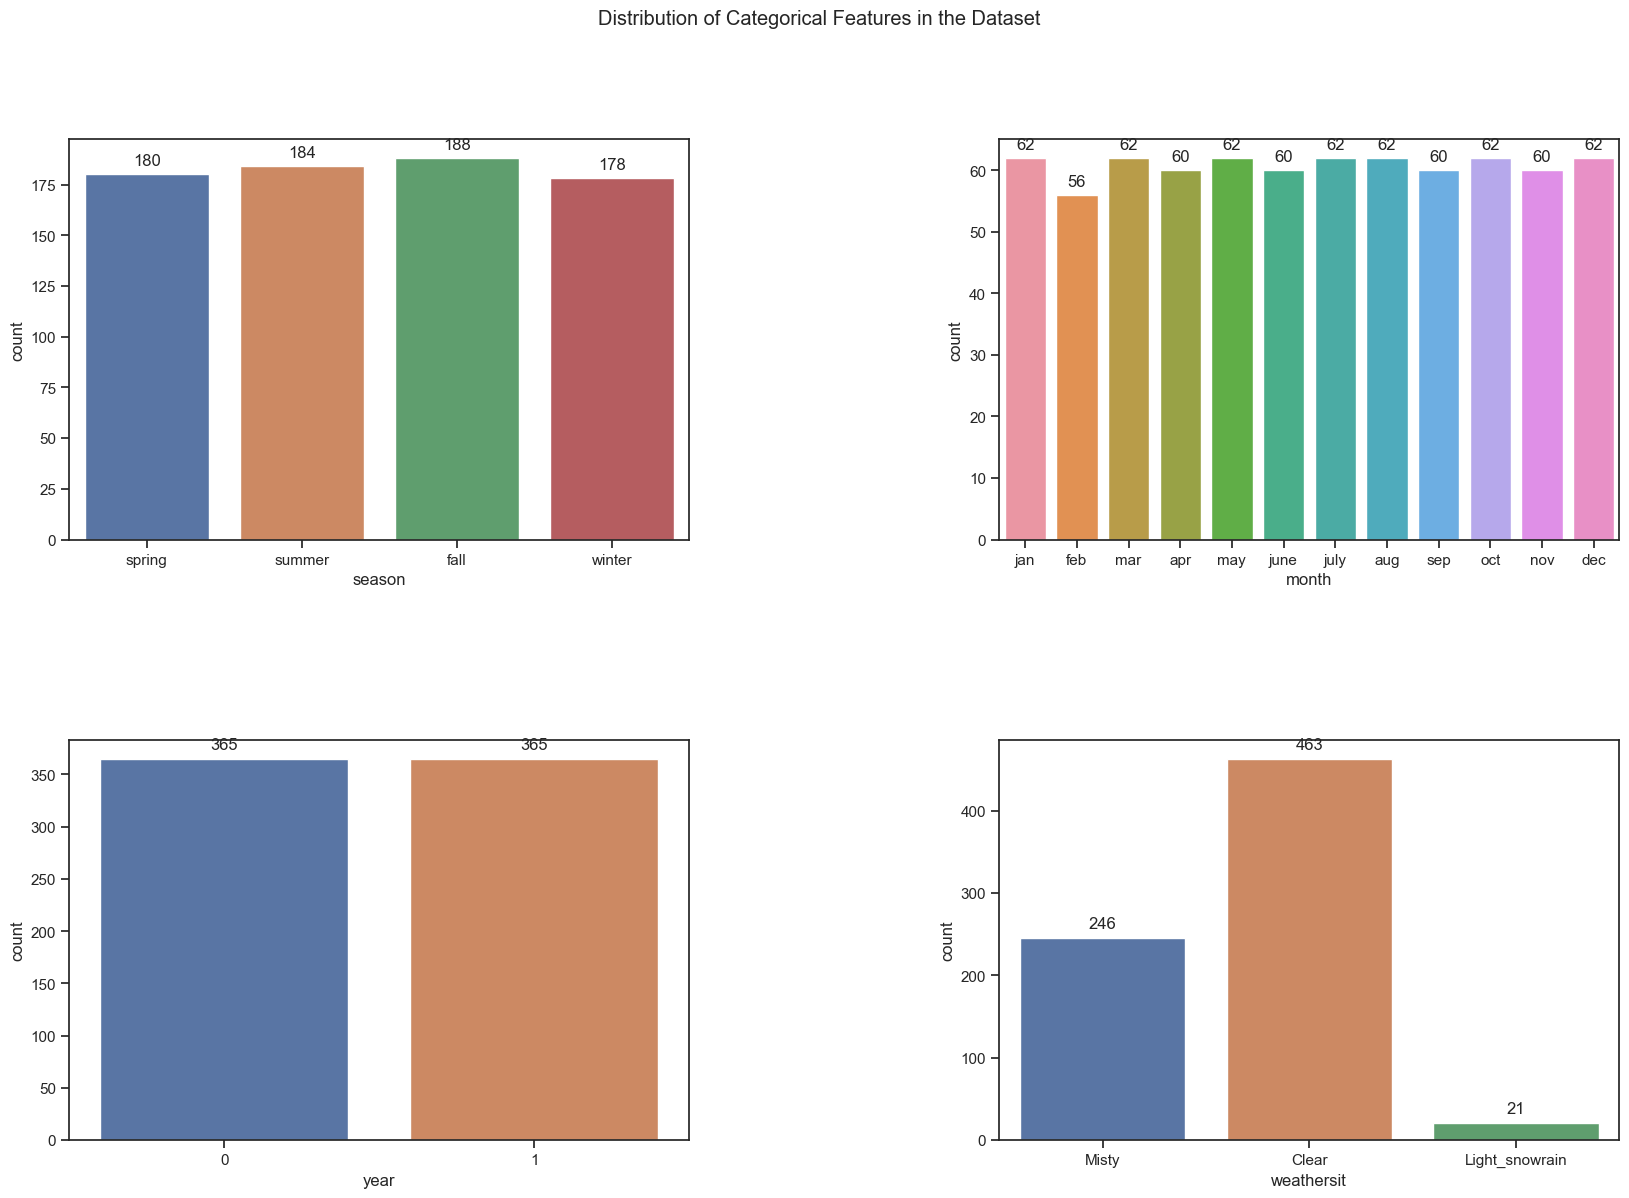

In [61]:
fig, ax = plt.subplots(2, 2, figsize=(20, 13))

sns.countplot(data=df, x="season", ax=ax[0, 0])
ax[0, 0].set_xlabel('season')
ax[0, 0].set_ylabel('count')
for p in ax[0, 0].patches:
    ax[0, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(data=df, x="month", ax=ax[0, 1])
ax[0, 1].set_xlabel('month')
ax[0, 1].set_ylabel('count')
for p in ax[0, 1].patches:
    ax[0, 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(data=df, x="year", ax=ax[1, 0])
ax[1, 0].set_xlabel('year')
ax[1, 0].set_ylabel('count')
for p in ax[1, 0].patches:
    ax[1, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(data=df, x="weathersit", ax=ax[1, 1])
ax[1, 1].set_xlabel('weathersit')
ax[1, 1].set_ylabel('count')
for p in ax[1, 1].patches:
    ax[1, 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig.suptitle('Distribution of Categorical Features in the Dataset')
fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

In [62]:
df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temperature', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

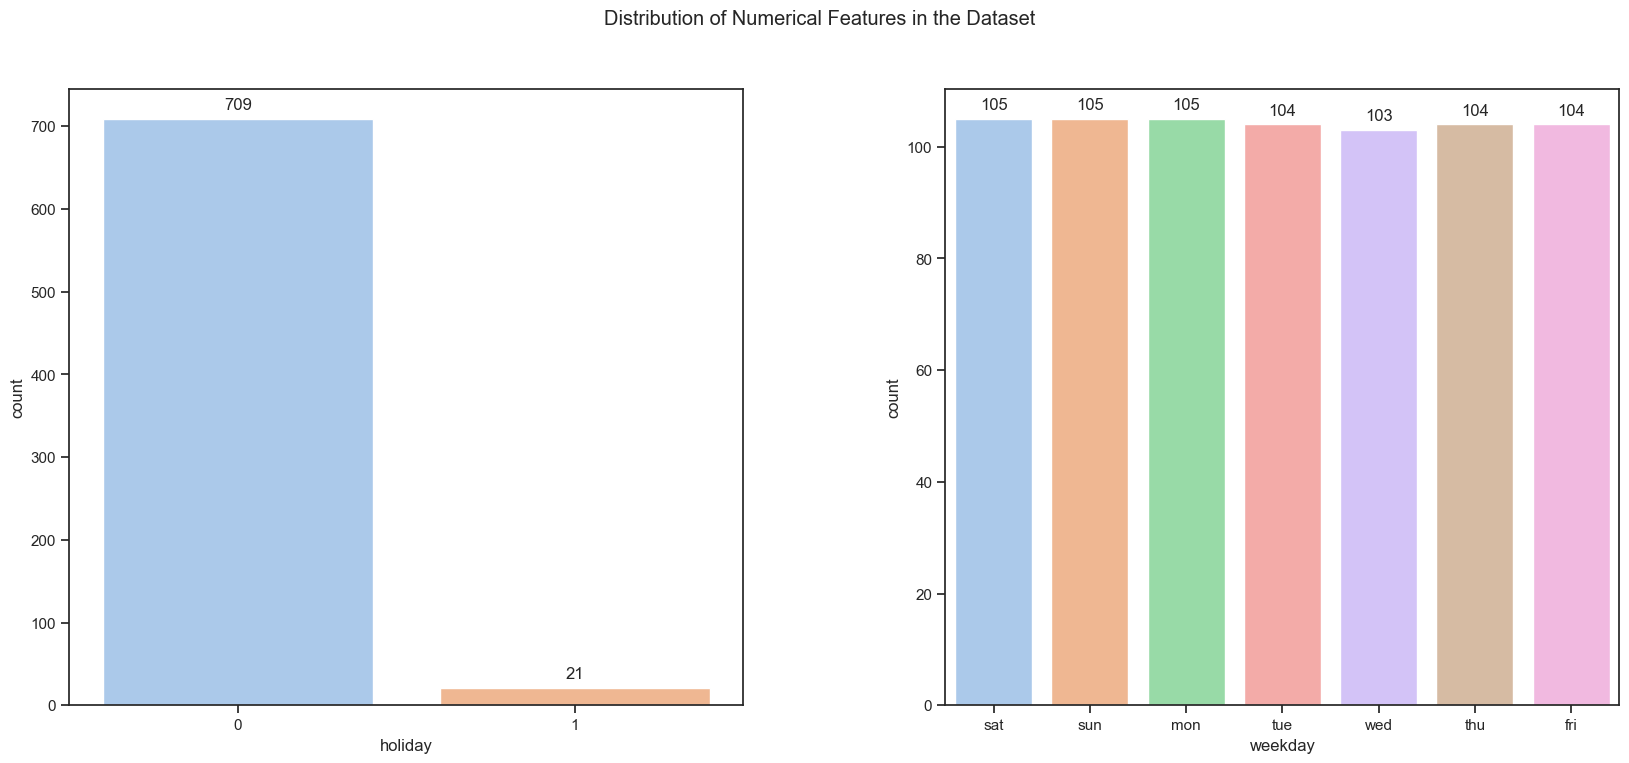

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x="holiday", palette="pastel", ax=ax[0])
ax[0].set_xlabel('holiday')
ax[0].set_ylabel('count')
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(data=df, x="weekday", palette="pastel", ax=ax[1])
ax[1].set_xlabel('weekday')
ax[1].set_ylabel('count')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig.suptitle('Distribution of Numerical Features in the Dataset')
fig.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()

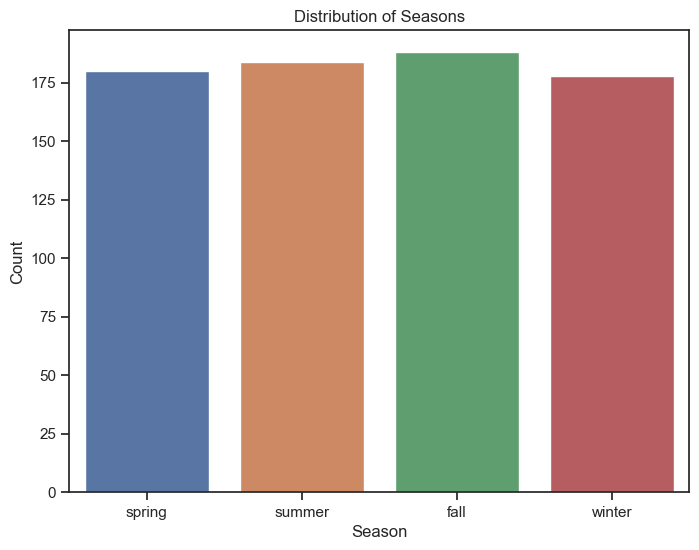

In [76]:
# Univariate analysis - Barplot for 'season'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='season')
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

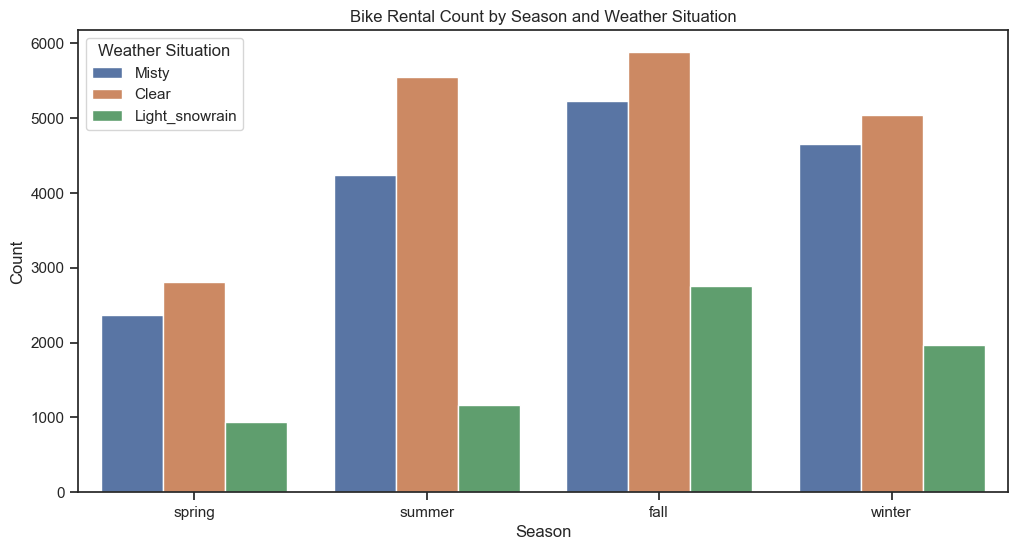

In [74]:
# Multivariate analysis - Barplot for 'season', 'weathersit', and 'holiday'
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='season', y='count', hue='weathersit', ci=None)
plt.title('Bike Rental Count by Season and Weather Situation')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Weather Situation')
plt.show()

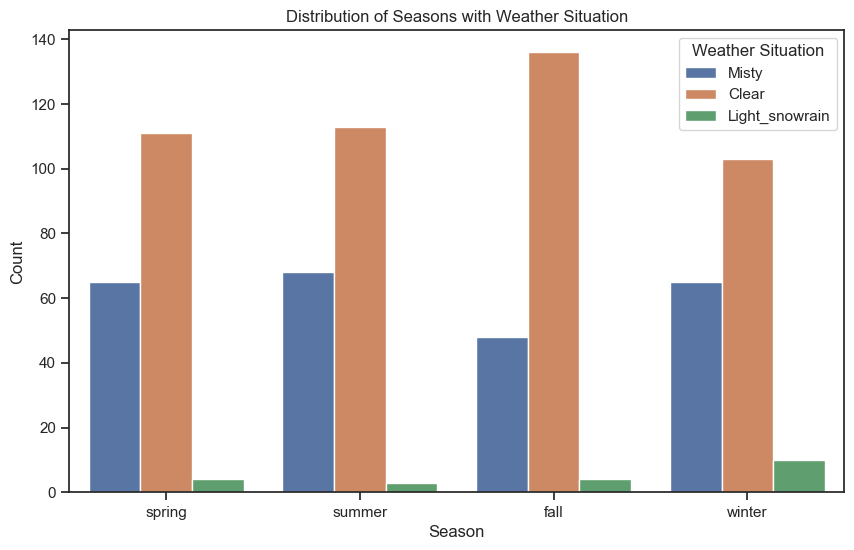

In [85]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='season', hue='weathersit')
plt.title('Distribution of Seasons with Weather Situation')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Weather Situation')
plt.show()

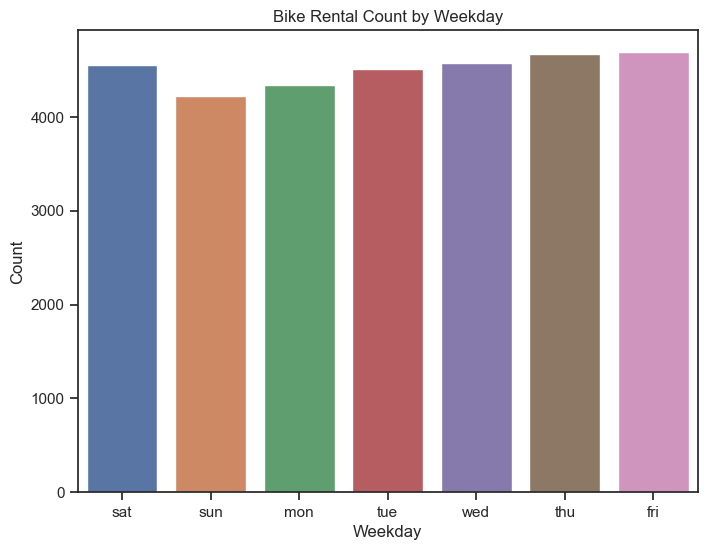

In [78]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='weekday', y='count', ci=None)
plt.title('Bike Rental Count by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()


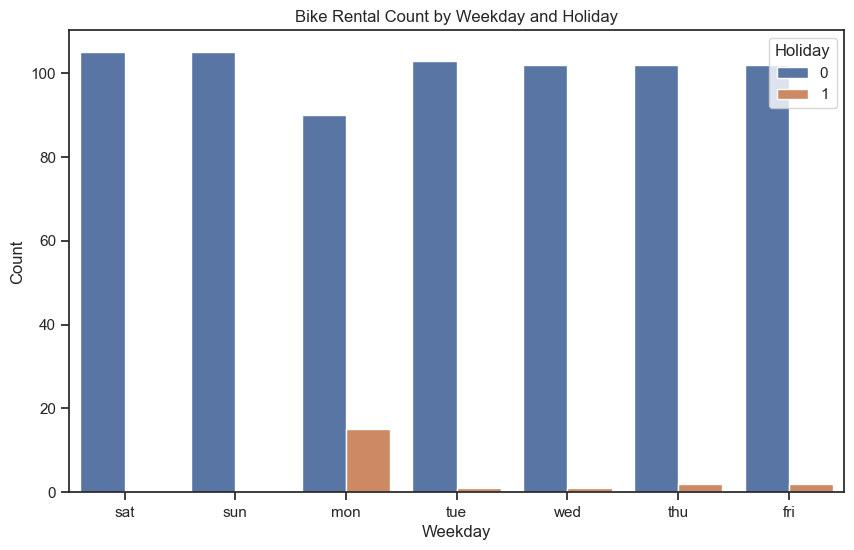

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weekday', hue='holiday')
plt.title('Bike Rental Count by Weekday and Holiday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Holiday')
plt.show()


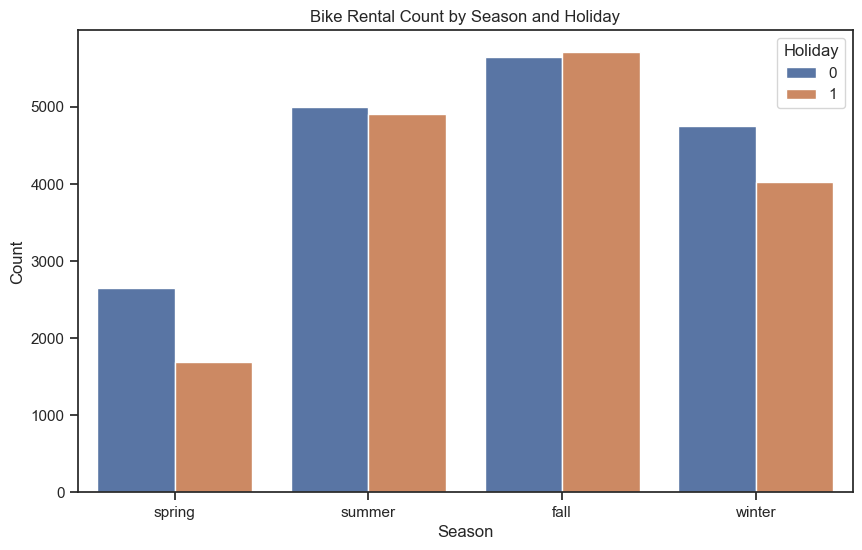

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='season', y='count', hue='holiday', ci=None)
plt.title('Bike Rental Count by Season and Holiday')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Holiday')
plt.show()


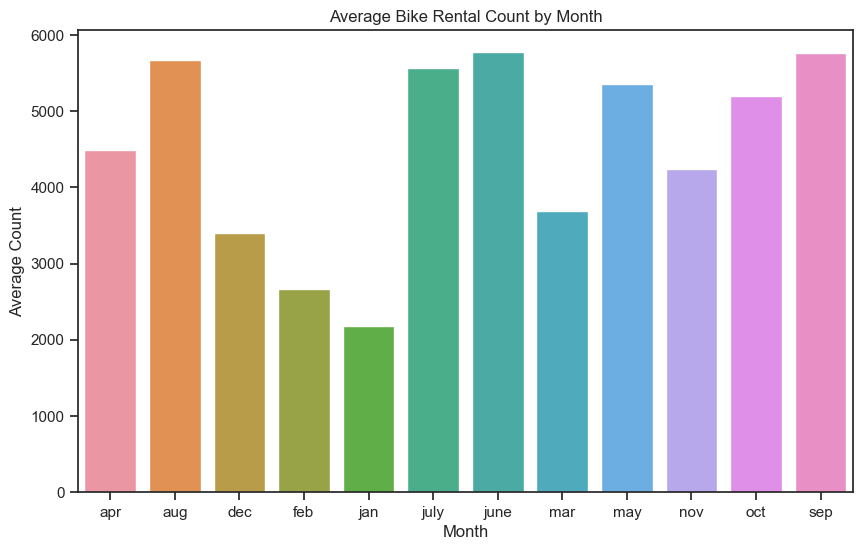

In [81]:
monthly_avg = df.groupby('month')['count'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg, x='month', y='count', ci=None)
plt.title('Average Bike Rental Count by Month')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.show()


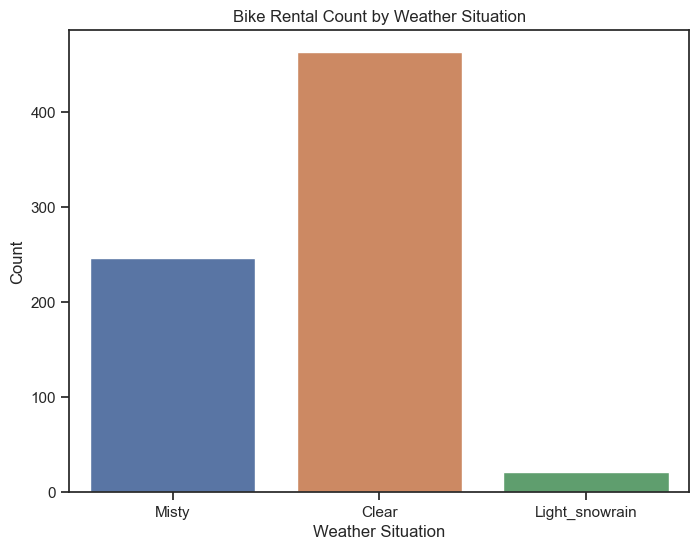

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='weathersit')
plt.title('Bike Rental Count by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.show()


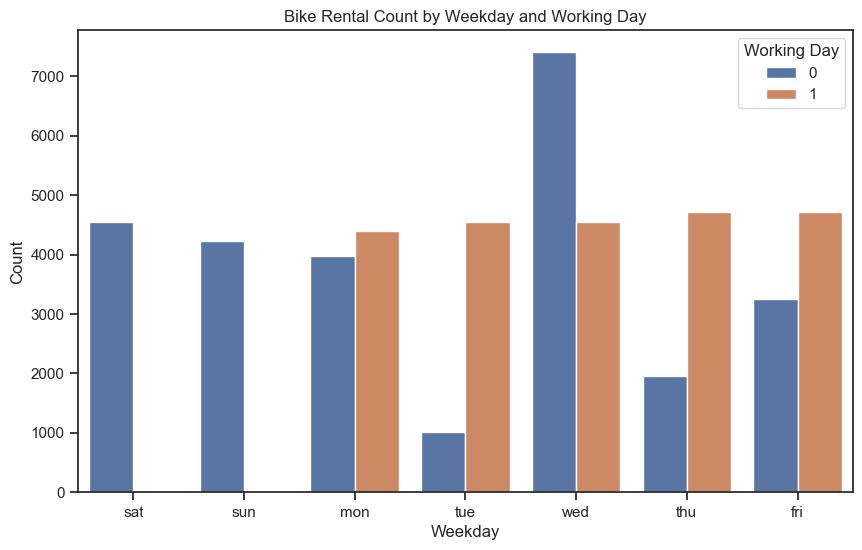

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='weekday', y='count', hue='workingday', ci=None)
plt.title('Bike Rental Count by Weekday and Working Day')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Working Day')
plt.show()


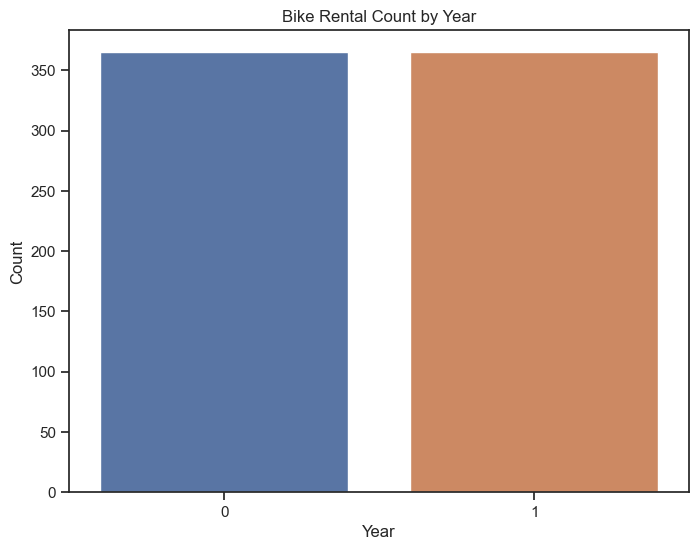

In [87]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='year')
plt.title('Bike Rental Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [503]:
df.drop('atemp' , axis=1, inplace=True)

In [504]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,count
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [505]:
df.shape

(730, 11)

In [506]:
season = pd.get_dummies(df["season"],drop_first=True)
weathersit = pd.get_dummies(df["weathersit"],drop_first=True)
mnth = pd.get_dummies(df["month"],drop_first=True)
weekday = pd.get_dummies(df["weekday"],drop_first = True)

In [507]:
df = pd.concat([df,season,weathersit,month,weekday],axis=1)

In [508]:
df

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,count,spring,summer,winter,Light_snowrain,Misty,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,thu,1,Misty,10.420847,65.2917,23.458911,2114,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
726,spring,1,dec,0,fri,1,Misty,10.386653,59.0000,10.416557,3095,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
727,spring,1,dec,0,sat,0,Misty,10.386653,75.2917,8.333661,1341,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,spring,1,dec,0,sun,0,Clear,10.489153,48.3333,23.500518,1796,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [509]:
# as we have the dummy varaibles we are dropping the extra column

df.columns

df.drop(columns = ["weathersit","month","season","weekday"],inplace=True)

In [510]:
df.shape

(730, 29)

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temperature     730 non-null    float64
 4   humidity        730 non-null    float64
 5   windspeed       730 non-null    float64
 6   count           730 non-null    int64  
 7   spring          730 non-null    uint8  
 8   summer          730 non-null    uint8  
 9   winter          730 non-null    uint8  
 10  Light_snowrain  730 non-null    uint8  
 11  Misty           730 non-null    uint8  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [512]:
df.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,Light_snowrain,Misty,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [636]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [637]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [638]:
df_train_x.head()

,year,holiday,workingday,temperature,humidity,windspeed,season_fall,season_spring,season_summer,season_winter,month_apr,month_aug,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,29.246653,70.4167,11.083475,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [639]:
# Scaling the features
scaler = MinMaxScaler()

In [640]:
num = ['temperature','humidity','windspeed','count']
df_train[num] = scaler.fit_transform(df_train[num])

In [641]:
df_train.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,Light_snowrain,Misty,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


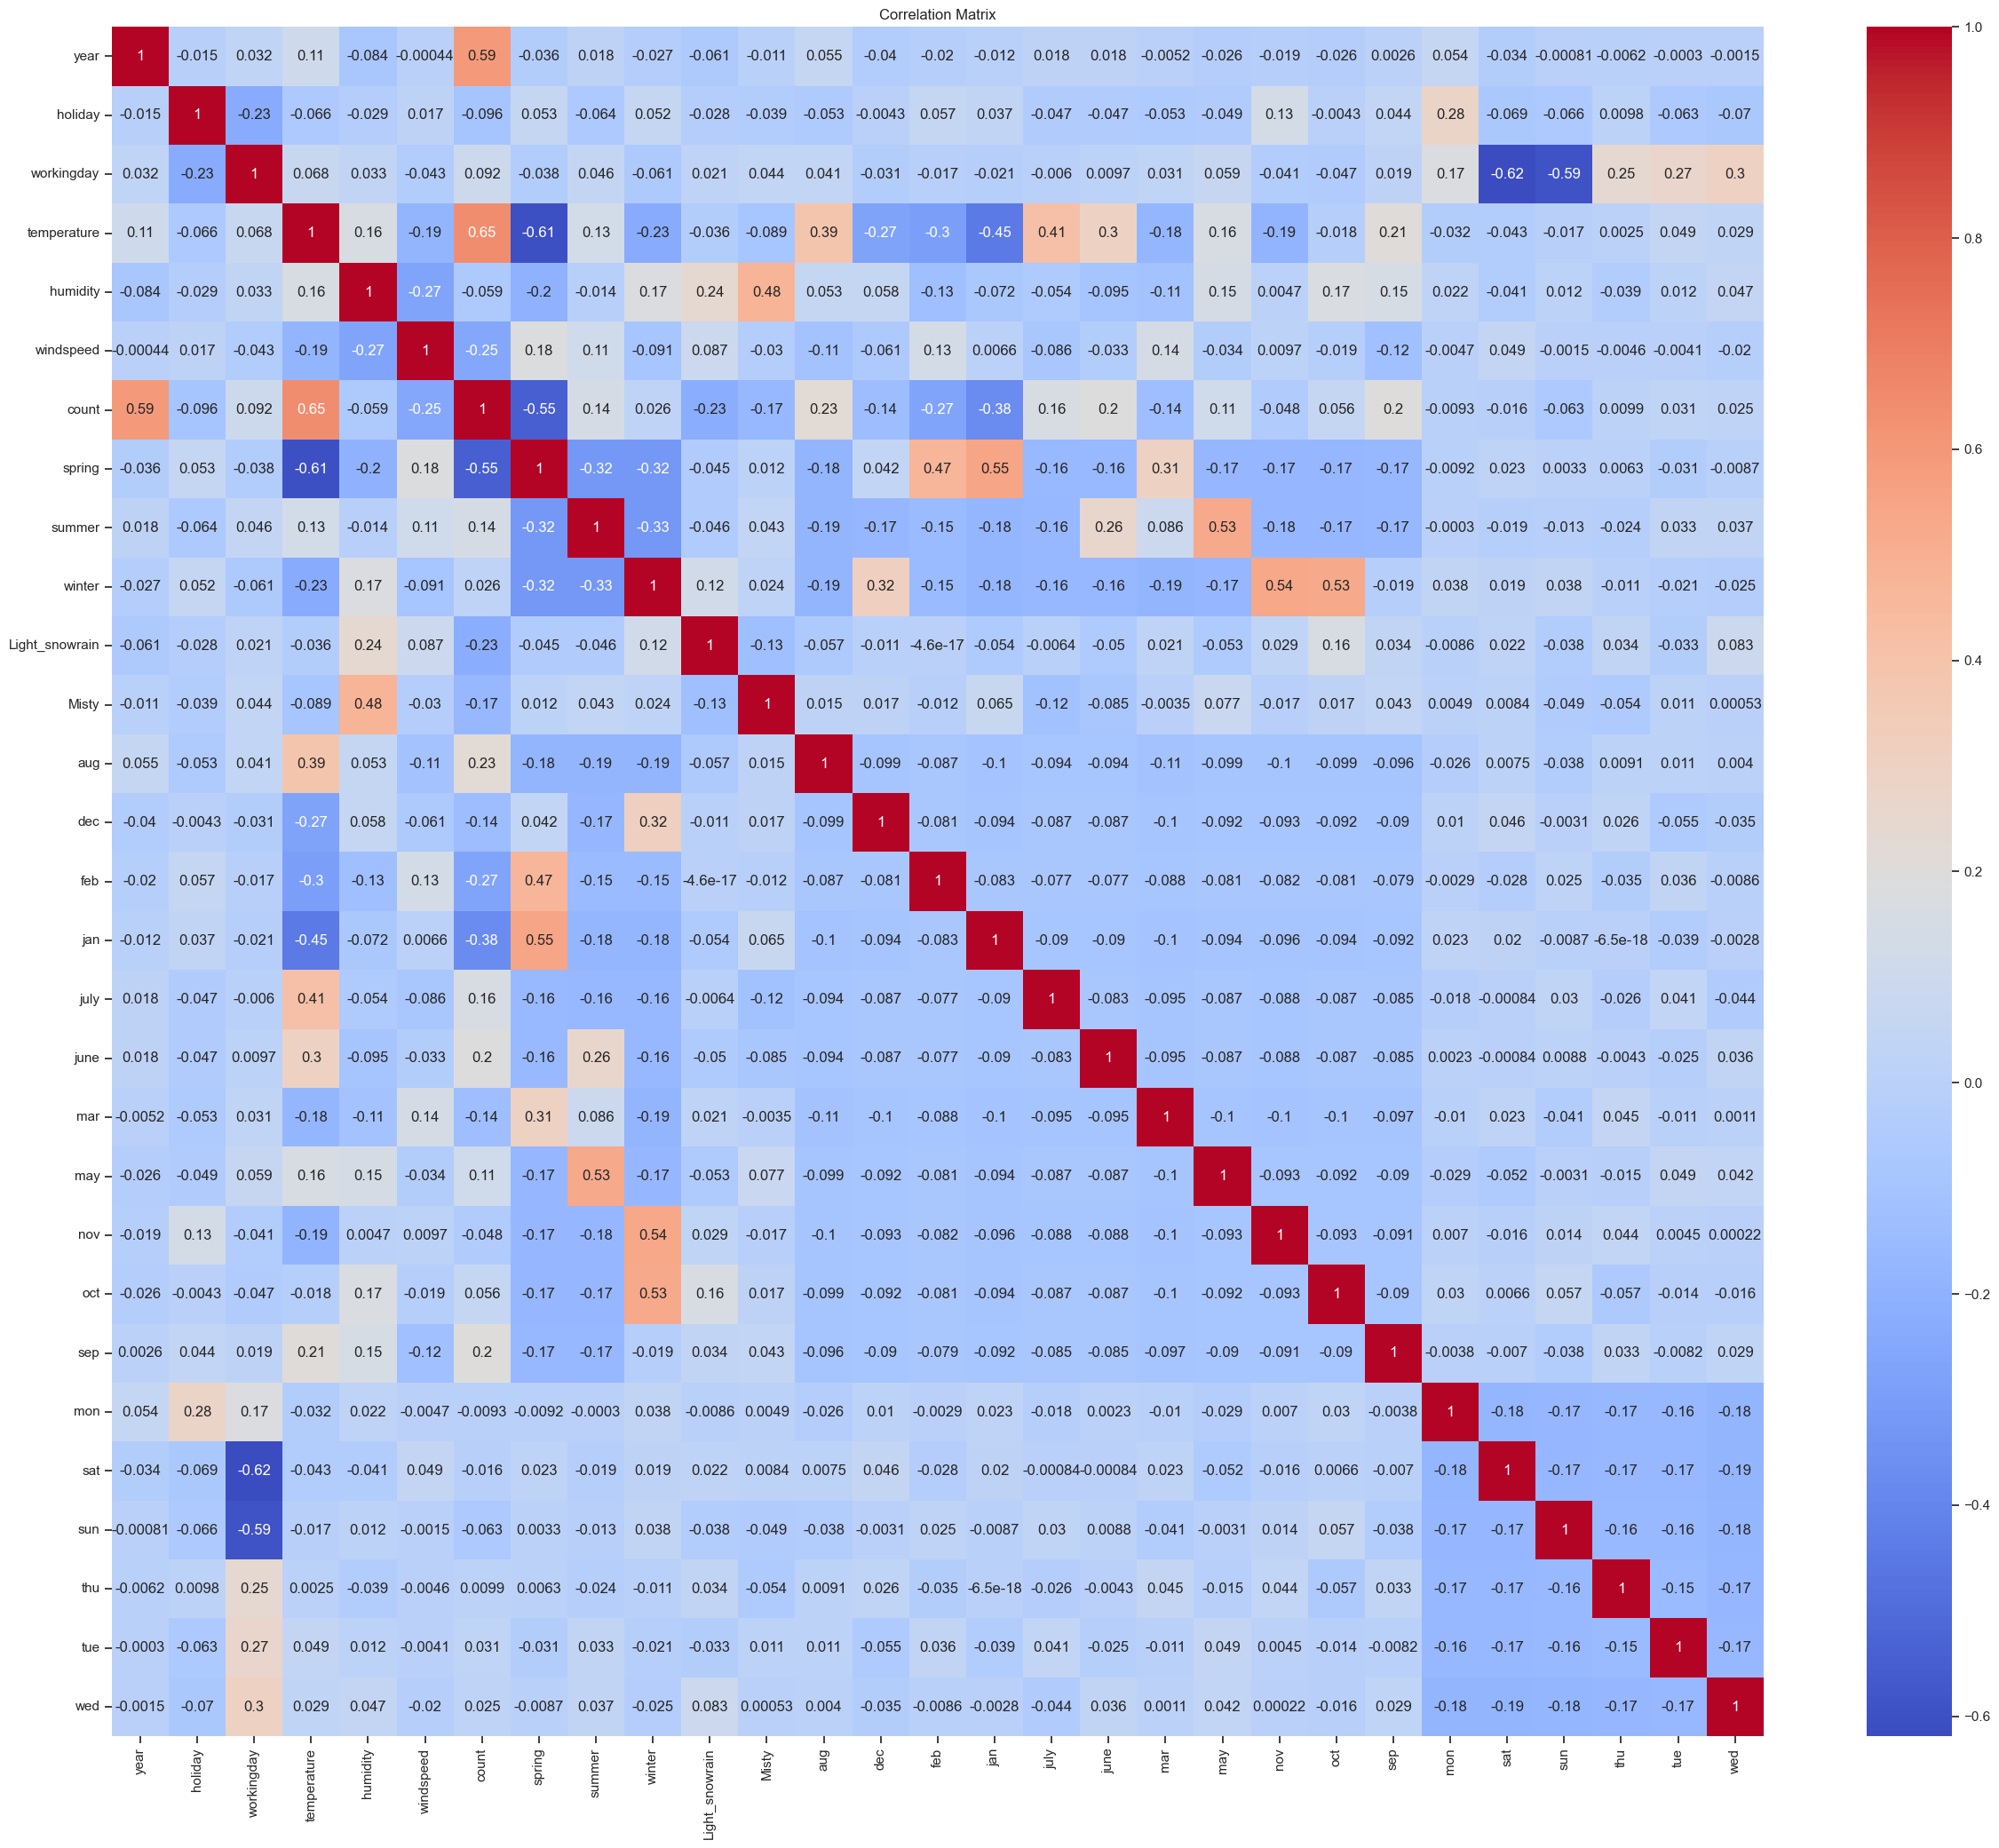

In [642]:

# Multivariate analysis - Heatmap
corr_matrix = df_train.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [643]:
# Extracting X_train and y_train from trainig dataset
y_train = df_train.pop('count')
X_train = df_train

In [644]:
# (RFE) Recursive feature elimination using RFE Function

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [645]:
#variables selected by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('aug', False, 7),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', False, 3),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 13)]

In [646]:
# Selecting the varibles from the list of features selected using RFE
X_train.columns[rfe.support_]

Index(['year', 'holiday', 'workingday', 'temperature', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'Light_snowrain', 'Misty', 'july', 'sep',
       'sat', 'sun'],
      dtype='object')

In [647]:
#Checking columns rejected via RFE
X_train.columns[~(rfe.support_)]

Index(['aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'thu', 'tue', 'wed'],
      dtype='object')

In [648]:
# dataframe of selected variables by RFE

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,year,holiday,workingday,temperature,humidity,windspeed,spring,summer,winter,Light_snowrain,Misty,july,sep,sat,sun
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0


In [649]:
#calculating VIF

def VIF(df):
    df=df.drop(['const'],axis=1)
    vif = pd.DataFrame()
    X=df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [650]:
# Adding Constant to the model 
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          2.11e-191
Time:                        23:35:35   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1995      0.028      7.

In [651]:
lr_1.params

const             0.199526
year              0.229763
holiday          -0.018447
workingday        0.083669
temperature       0.527708
humidity         -0.161086
windspeed        -0.180875
spring           -0.055546
summer            0.053733
winter            0.099214
Light_snowrain   -0.245009
Misty            -0.056344
july             -0.054616
sep               0.081983
sat               0.093668
sun               0.040636
dtype: float64

In [652]:
#Calculating VIF 
calcVIF(X_train_lm_1)

,Features,VIF
2,workingday,50.68
13,sat,12.20
14,sun,11.79
6,spring,5.02
3,temperature,3.62
8,winter,3.49
1,holiday,2.91
7,summer,2.62
4,humidity,1.91
10,Misty,1.57


In [653]:
X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

In [654]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          2.11e-191
Time:                        23:35:36   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1811      0.042      4.

In [655]:
calcVIF(X_train_lm_2)

,Features,VIF
3,humidity,32.10
2,temperature,18.99
1,workingday,18.41
4,windspeed,4.91
12,sat,4.91
5,spring,4.80
13,sun,4.76
7,winter,3.69
6,summer,3.04
9,Misty,2.31


In [656]:
# We can drop humidity variable as it has low p-value and high VIF
X_train_new = X_train_new.drop(['humidity'], axis = 1)

In [657]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
# lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     31.23
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           2.77e-56
Time:                        23:35:37   Log-Likelihood:                 191.38
No. Observations:                 510   AIC:                            -354.8
Df Residuals:                     496   BIC:                            -295.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [658]:
calcVIF(X_train_lm_3)

,Features,VIF
1,workingday,16.19
2,temperature,12.74
3,windspeed,4.76
11,sat,4.45
12,sun,4.21
4,spring,3.82
6,winter,2.78
5,summer,2.76
0,year,2.07
9,july,1.60


In [659]:
# # We can drop workingday variable as it has low p-value and high VIF
X_train_new = X_train_new.drop(['workingday'], axis = 1)

In [660]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          2.06e-186
Time:                        23:35:39   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2003      0.030      6.

In [661]:
calcVIF(X_train_lm_4)

,Features,VIF
1,temperature,5.18
2,windspeed,4.62
4,summer,2.24
3,spring,2.11
0,year,2.07
5,winter,1.82
8,july,1.59
7,Misty,1.55
9,sep,1.33
10,sat,1.22


In [662]:
# We can drop sat variable as it has high p-value and low VIF
X_train_new = X_train_new.drop(['temperature'], axis = 1)

In [663]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     146.2
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          4.39e-148
Time:                        23:35:40   Log-Likelihood:                 406.57
No. Observations:                 510   AIC:                            -789.1
Df Residuals:                     498   BIC:                            -738.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5866      0.017     34.

In [664]:
calcVIF(X_train_lm_5)

,Features,VIF
1,windspeed,3.87
2,spring,2.09
3,summer,2.04
0,year,1.84
4,winter,1.78
6,Misty,1.51
7,july,1.21
9,sat,1.21
10,sun,1.20
8,sep,1.16


In [665]:
#Checking the trainig dataset from which we got lr_5 
X_train_lm_5.head()

,const,year,windspeed,spring,summer,winter,Light_snowrain,Misty,july,sep,sat,sun
576,1.0,1,0.264686,0,0,0,0,0,1,0,0,0
426,1.0,1,0.255342,1,0,0,0,1,0,0,1,0
728,1.0,1,0.663106,1,0,0,0,0,0,0,0,1
482,1.0,1,0.188475,0,1,0,0,1,0,0,1,0
111,1.0,0,0.380981,0,1,0,0,1,0,0,0,0


In [666]:
#Calculation y_train predicted value
y_train_pred = lr_5.predict(X_train_lm_5)

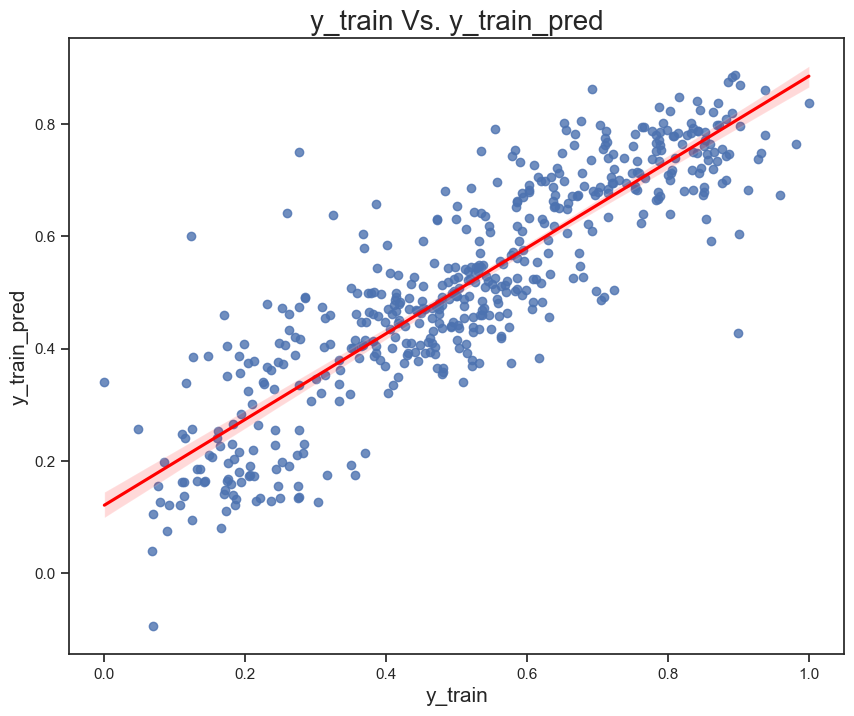

In [667]:
# Visualising y_train vs y_train_pred
plt.figure(figsize=(10, 8))
reg_plot = sns.regplot(x=y_train, y=y_train_pred, line_kws={'color': 'red'})
plt.title('y_train Vs. y_train_pred', fontdict={'fontsize': 20})
plt.xlabel('y_train', fontdict={'fontsize': 15})
plt.ylabel('y_train_pred', fontdict={'fontsize': 15})

plt.show()

<Figure size 640x480 with 0 Axes>

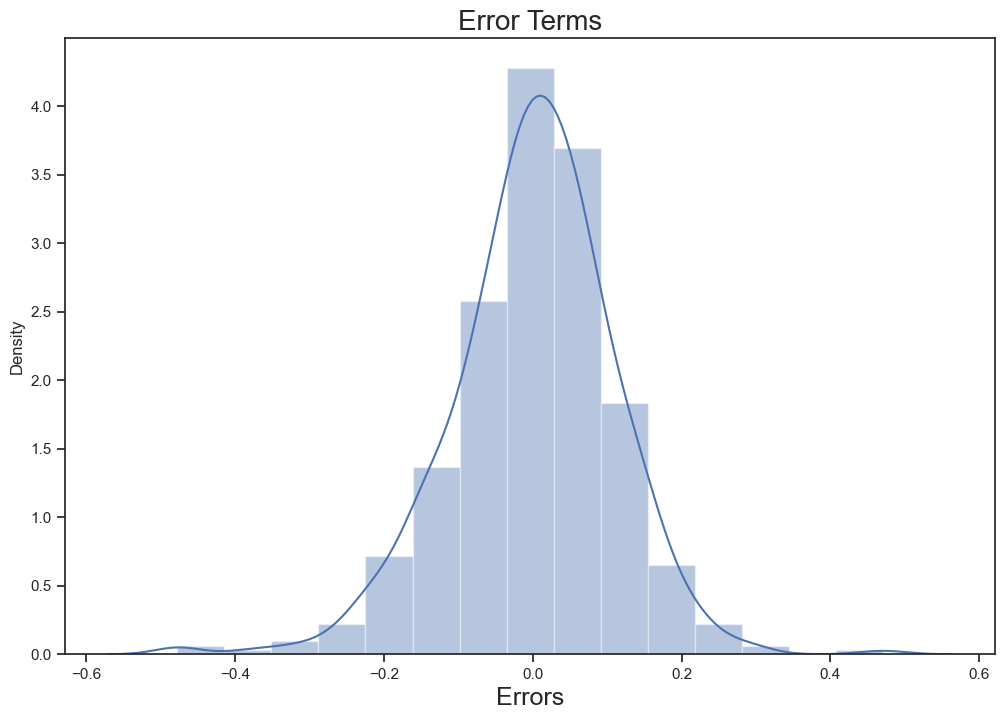

In [668]:
fig = plt.figure()
plt.figure(figsize=(12, 8))
sns.distplot((y_train - y_train_pred), bins=15)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()


In [669]:
df_test[num] = scaler.transform(df_test[num])
df_test.head()

,year,holiday,workingday,temperature,humidity,windspeed,count,spring,summer,winter,Light_snowrain,Misty,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [670]:
y_test = df_test.pop('count')
X_test = df_test

In [671]:
X_train_lm_5.drop(['const'], inplace=True , axis=1)

In [672]:
# Creating X_test_new with columns that are in the final model
X_test_new = X_test[X_train_lm_5.columns]

# Adding constant
X_test_new = sm.add_constant(X_test_new)

# Making predictions using final model on test data
y_test_pred = lr_5.predict(X_test_new)

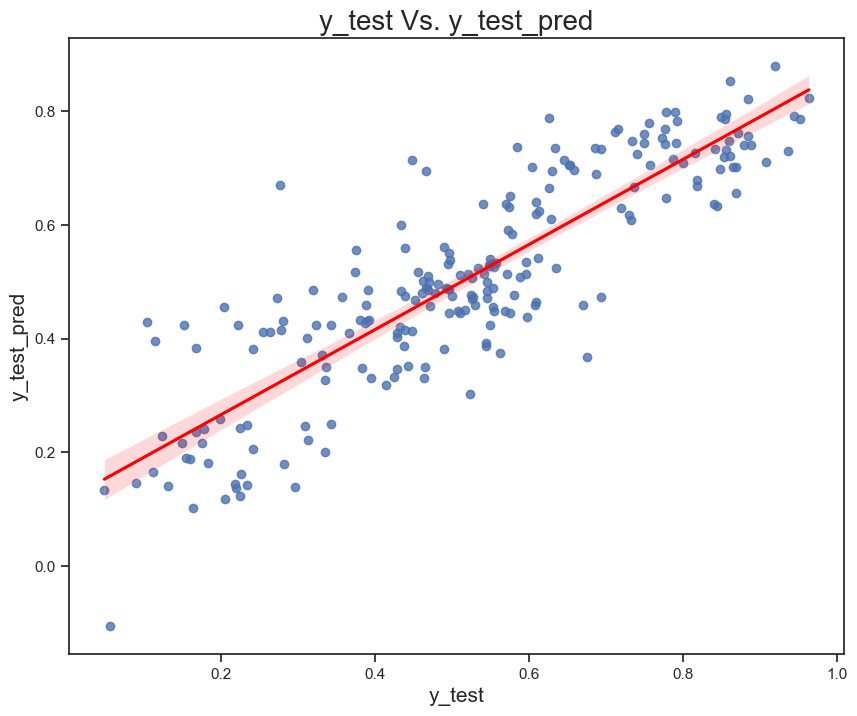

In [673]:
# Let's visualize y_test vs. y_test_pred
plt.figure(figsize=(10, 8))
reg_plot = sns.regplot(x=y_test, y=y_test_pred, line_kws={'color': 'red'})
plt.title('y_test Vs. y_test_pred', fontdict={'fontsize': 20})
plt.xlabel('y_test', fontdict={'fontsize': 15})
plt.ylabel('y_test_pred', fontdict={'fontsize': 15})
plt.show()

In [674]:
# R-squared value for the final model on test set
r2 = r2_score(y_test, y_test_pred)
print(r2)

0.7479212951462255


In [675]:
# Adjusted R-squared value for the final model on test set
adj_r2 = 1-(1-r2)*((df_test.shape[0]-1)/(df_test.shape[0]-11-1))
print(adj_r2)

0.7345902097933816


In [676]:
lr_5.params.sort_values(ascending=False)

const             0.586622
year              0.247793
sep               0.068067
sat               0.011596
july             -0.009112
sun              -0.043125
summer           -0.043670
winter           -0.079997
Misty            -0.089523
windspeed        -0.173593
Light_snowrain   -0.296406
spring           -0.302268
dtype: float64

* The R Square for the test Data is 0.7479
* The adjusted R square for the  test Data is 0.7345